<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Calories_Burned_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Import

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmendes/fmendesdat263xdemos")

print("Path to dataset files:", path)

100%|██████████| 296k/296k [00:00<00:00, 64.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fmendes/fmendesdat263xdemos/versions/1


Dependencies

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from  xgboost import XGBRegressor

Data pull & overview

In [24]:
excercise = pd.read_csv('/root/.cache/kagglehub/datasets/fmendes/fmendesdat263xdemos/versions/1/exercise.csv')
calories = pd.read_csv('/root/.cache/kagglehub/datasets/fmendes/fmendesdat263xdemos/versions/1/calories.csv')

In [25]:
excercise.shape

(15000, 8)

In [26]:
calories.shape

(15000, 2)

In [9]:
data = pd.merge(excercise,calories, on='User_ID', how='left')

In [28]:
excercise.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [27]:
excercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [29]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Encoding categorical variables

In [30]:
LE = LabelEncoder()
excercise['Gender'] = LE.fit_transform(excercise['Gender'])
# print(dict(zip(LE.classes_, LE.transform(LE.classes_))))

{'female': np.int64(0), 'male': np.int64(1)}


In [31]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8


In [32]:
data = pd.merge(excercise,calories, on='User_ID', how='left')

In [33]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [37]:
cor = data.corr()

<Axes: >

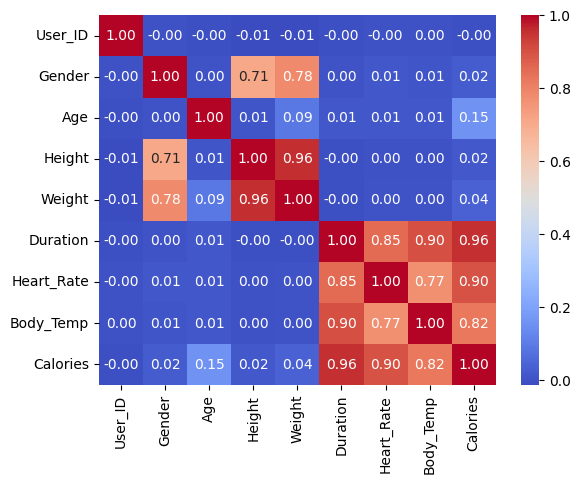

In [41]:
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f')

Scaling numerical variables

In [45]:
SS = StandardScaler()
col_to_scale = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

data[col_to_scale] = SS.fit_transform(data[col_to_scale])

In [46]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,231.0
1,14861698,0,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,66.0
2,11179863,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,26.0
3,16180408,0,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,71.0
4,17771927,0,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,35.0


Feature Selection

In [47]:
X = data.drop(columns=['User_ID','Calories'],axis=1)
Y = data['Calories']

In [48]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

Training XGBoost Regressor Model

In [55]:
regressor = XGBRegressor(n_estimators=100)
regressor.fit(Xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation by computing Mean Absolute Error

In [58]:
xtrpredict = regressor.predict(Xtrain)

mae = metrics.mean_absolute_error(xtrpredict,Ytrain)
mae

0.9675022807518641

In [59]:
xtstpredict = regressor.predict(Xtest)

maet = metrics.mean_absolute_error(xtstpredict,Ytest)
maet

1.5521575984954834